## Problem Statement
---

American Football is a very popular sport in the United States. Two of the biggest leagues that host the sport are the NFL, The National Football League, which is the professional organization that contain 32 teams across the USA, and NCAA College Football, which is the ameatur version of the NFL teams where over 100 Colleges and Universities have a team of student athelethes to compete in the sport. 

These two leagues have similar and contrasting reasons that makes the sport so amazing and competitive. Spectators are generally fans of one and not the other for varying reasons. I would like to make an attempt at bridging that gap. I plan to create a recommender system that recommends a comparative team to the average NFL fan based off of their favorite NFL team and favorite style of play (offense, defense, passing, etc.)

## Data Collection
---

The data I collected was scraped from the website sportsreference.com. This site is comprised of several sites that provides statistics for MANY sports. Their aim is to provide the most complete and accessible statistics that can be found anywhere.

This site works perfectly for me because it has all of the major stats for both college and NFL football dating back to the start of each of those leagues.

I collected offensive and defensive stats for college football dating back to 1985 and those same stats for the NFL dating back to 1970.

The process of gathering the data included using selenium and beautiful soup to scrape the website. The way that the website is structured is that it have several tables displayed that contains different variations of stats. sportsreference.com uses javascript to load these tables as you access the page. This required me to use selenium to access the tables of stats that I needed because simply using the requests library was returning unfavorable results. After gaining access to the tables I used beautiful soup to parse through the HTML to obtain the data. I utitlize this information to program several 'for loops' that loops through each row, table, and yearly page.

The scraper notebooks for both yielded the following data:
* NFL: 1,477 observations/teams and 68 unique columns/statisitical categories
* College: 2,428 observations/teams and 66 unique columns/statistical categories

## Exploratory Data Analysis
---

The ultimate goal is to merge the 2 seperate DataFrame types into one with the same column length and column types. In order to achieve this there are several things that I must consider.
* The columns between both the NFL & College DataFrames have different orders. So I am going to realign them to be better suited to be joined later on.
* Also, the data or stats in each observation are not the same as well. (i.e. college provides there stats on an average per game basis and the nfl provides stats in total across the season, among other things. 
* Since we will be comparing the NFL to the College stats, I would like for my stats to be on a per game basis to make sure we are comparing apples to apples as much as possible. (NFL plays more games than College so their total stats would be more than college's).

I first divided each column of the NFL DataFrame by 16, which is number of games the NFL plays in per season, to achieve the per game average that the college DataFrame has. Next I next engineered two additional columns into the NFL DataFrame, using already available columns. (turnover & opponent completion percentage)

Finally I concatenated both sets of data and selected the 36 columns that matched between the NFL & College data and that I would like to explore in my recommender. I limited the years included in my DataFrame to 2014 to 2018 to represent the teams based of their most recent performance, due to the nature of turnover for each team in both leagues. 

As mentioned before, I am comparing two different leagues so their statisical peformance varies, on average. Since I am comparing these two, it is important to understand how and what categories differ. To tuly understand the distributions, I created a function that prints out 2 compariative box plots and 2 histograms of each statisical category of choice (a column in my DataFrame) between the NFL and college leagues.

The top findings from these distributions were: 
* Overall the spread of each statistic are generally wider for college than NFL, this make sense as there is only 32 NFL teams represented per year against over 100 college teams represented per year. This will naturally have more variation in their results.
* The average of most of the statistics are typically close between both leagues, with the exception of stats in the rushing category, offensive fumbles, & point totals.

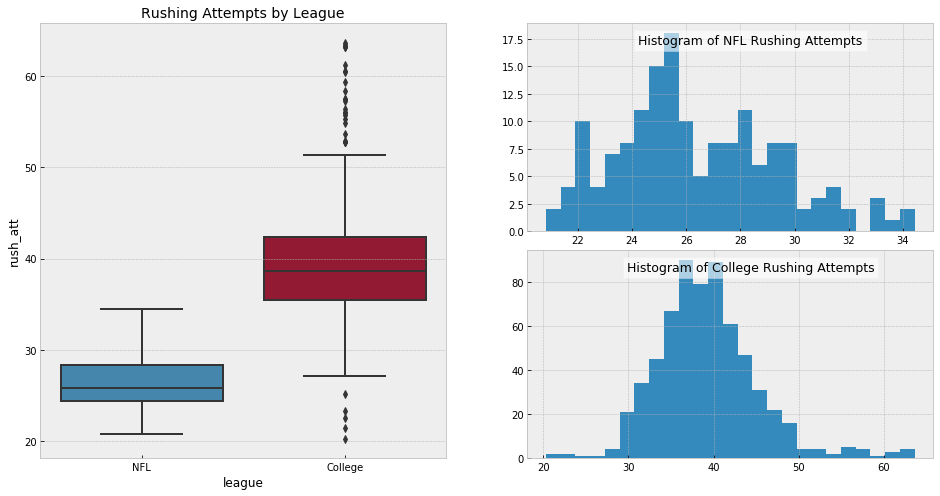

As seen in the image of above, there is a large descrepancy between the number of the rushing attempts that the NFL takes per game compared to the number of attempts that the college league takes. Because of the large difference in this category the other rushing categories follows this same trend.
* NFL has a mean of 26 rushing attempts.
* College has a mean of 39 rushing attempts.

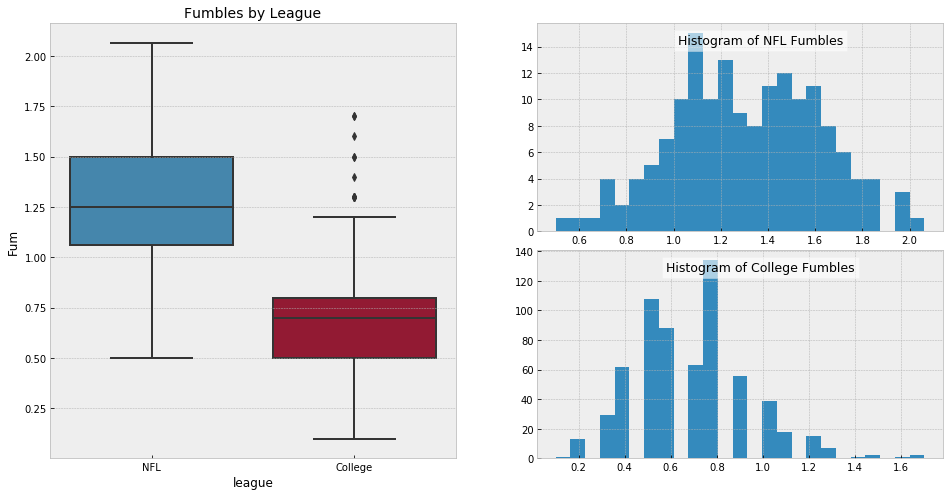

* NFL has a mean of 1.27 fumbles
* College has a mean of 0.68 fumbles

This is an interesting find seeing that the NFL runs the ball less so you would assume that they have less opportunites to fumble, in addition to it being more teams in College translating to more teams having more opportunites for fumbles.

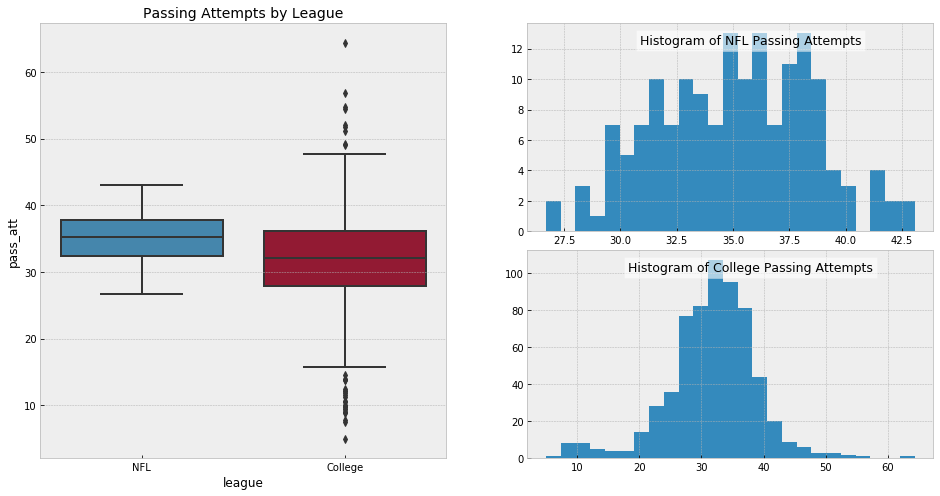

* NFL has a mean of 35 pass attempts a game.
* College has a mean of 31 pass attempts a game

As far as passing attempts the mean of both league are closer together with the NFL attempting 4 more passes on average than college football. College football though have a wider spread with some teams attempting up to 60 passes a game, where as in the NFL the most attempts a game is 43.

## Recommender System
---

My recommender was created by calculating the pairwise distances between each team based on the specific statisical categories. The distances are returned as a value between 0 and 1. With 0 being most similar and 1 being most different. I evaluated the strength of my recommender based off of this. My goal is to get teams similarity as close to 0 as possible, in addition to capturing a realistic comparison based off of each team's performance in their perspective leagues in that given year.

I have seperate versions of my recommender based off of several factors.
* all NFL & College teams from 2014 & 2018. Data is not scaled.
* all NFL & College teams from 2014 & 2018. Data is scaled using Z-scores.
* scaled data and only 1 NFL team of interest compared to all college teams.
* data is scaled using Min-Max scaling and 1 NFL team of interest compared to all college teams.

## Conclusion
---